## OR-tools example

This notebook demonstrates how to use `optiwindnet` to design collector system cable layouts using the **OR-Tools MILP router**.

In [2]:
from optiwindnet.api import WindFarmNetwork, Heuristic, MILP, ModelOptions, load_repository

In [3]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

In [4]:
ModelOptions.help()

topology in {"radial", "branched", "branched"} default: branched
    Set the topology of subtrees in the solution.

feeder_route in {"straight", "segmented", "segmented"} default: segmented
    If feeder routes must be "straight" or can be detoured ("segmented").

feeder_limit in {"unlimited", "specified", "minimum", "min_plus1", "min_plus2", "min_plus3", "unlimited"} default: unlimited
    Whether to limit the maximum number of feeders, if set to "specified", additional kwarg "max_feeders" must be given.

balanced [bool] default: False
    Whether to enforce balanced subtrees (subtree loads differ at most by one unit).

max_feeders [int] default: 0
    Maximum number of feeders (used only if <feeder_limit = "specified">)



### Initialize Moray East

>In this example, the `load_repository()` functionality is used to load a prebuilt *Networkx.Graph*. For more details on this functionality look into the notebook about [Load repositories containing location data](api_02-load-repositories.ipynb).

In [5]:
locations = load_repository()
wfn = WindFarmNetwork(L=locations.morayeast, cables=7)

<Axes: >

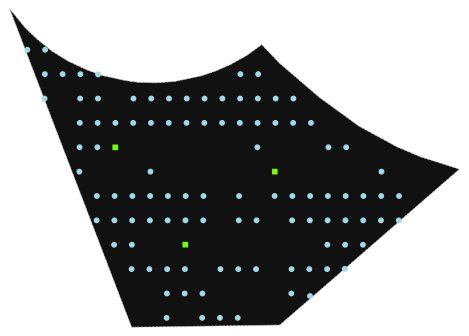

In [6]:
wfn.plot_location()

### Optimize Moray East

Initial heuristic solution to warm-start the solver:

In [7]:
model_options = ModelOptions(
                        topology='branched',
                        feeder_limit='unlimited',
                        feeder_route='segmented',
                    )
router_warmstart = Heuristic(solver='Esau_Williams', model_options=model_options) #
res_warmstart= wfn.optimize() # default is Heuristic Esau_Williams


In [8]:
wfn.length()

154216.06786855255

In [9]:
solver_options=dict(
    num_workers = 8,
)

model_options = ModelOptions(
                        topology='branched',
                        feeder_limit='unlimited',
                        feeder_route='segmented',
                    )

router = MILP(solver_name='ortools', time_limit=15, mip_gap=0.01, solver_options=solver_options,  verbose=True)

load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\zlib1.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\abseil_dll.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\utf8_validity.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\re2.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\libprotobuf.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\highs.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\ortools.dll...


>If desired, set the logging level to `INFO` **before running `.optimize()` with the MILP router** to display detailed messages about the solver configuration and warm-start behavior:
>```python
>import logging
>logging.basicConfig(level=logging.INFO)
>```

In [10]:
res = wfn.optimize(router=router)

>>> Using warm start: the model is initialized with the provided solution S <<<

Starting CP-SAT solver v9.12.4544
Parameters: max_time_in_seconds: 15 log_search_progress: true relative_gap_limit: 0.01 num_workers: 8

Initial optimization model '': (model_fingerprint: 0xca65b98aae4051db)
#Variables: 2'440 (#bools: 1'220 in floating point objective)
  - 1'220 Booleans in [0,1]
  - 920 in [0,6]
  - 300 in [0,7]
#kAtMostOne: 784 (#literals: 2'340)
#kLinear1: 2'440 (#enforced: 2'440)
#kLinearN: 303 (#terms: 6'100)

Starting presolve at 0.00s
The solution hint is complete and is feasible.
[Scaling] Floating point objective has 1220 terms with magnitude in [1119.02, 18596.1] average = 3976.33
[Scaling] Objective coefficient relative error: 2.09617e-10
[Scaling] Objective worst-case absolute error: 7.84164e-05
[Scaling] Objective scaling factor: 2.09715e+06
  8.55e-04s  0.00e+00d  [DetectDominanceRelations] 
  1.43e-02s  0.00e+00d  [operations_research::sat::CpModelPresolver::PresolveToFixPoi

In [11]:
wfn.G.SolutionInfo

SolutionInfo(runtime=15.104260000000002, bound=141351.27776184087, objective=146120.97659967092, relgap=0.032642122635804904, termination='FEASIBLE')

<Axes: >

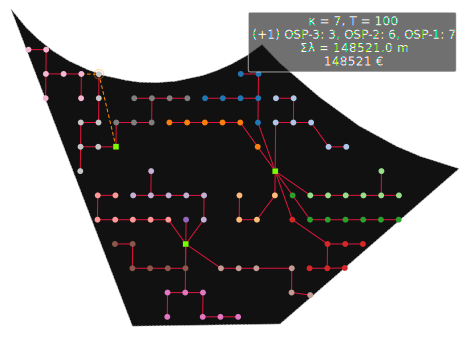

In [12]:
wfn.plot()